In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt
%matplotlib inline

## Read the dataset in dataframe

In [247]:
df = pd.read_csv(r'C:\Users\dchakrab.COMPUTACENTER\Downloads\Algerian_forest_fires_dataset_UPDATE.csv')

### Displaying first 5 rows

In [248]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## Data Cleaning

In [249]:
df.iloc[121:].head(4)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [250]:
df.drop(index=[122,123,124], inplace = True)

In [252]:
df.reset_index(inplace = True)

In [253]:
df.iloc[121:].head(4)

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


In [254]:
df.drop('index', axis=1, inplace = True)

## Creating Boolean values for Bejaia Region and Sidi Abbess Region Dataset

In [255]:
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1

## Summary of the dataset

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [257]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### Removing spaces from column names

In [258]:
df.columns = [i.strip() for i in df.columns]

In [259]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### changing datatypes

In [260]:
df_dtypes={'day':'int64','month':'int64','year':'int64','Temperature':'int64','RH':'int64','Ws':'int64','Rain':'float64','FFMC':'float64','DMC':'float64','DMC':'float64','DC':'float64','ISI':'float64','BUI':'float64'}
df=df.astype(df_dtypes)

In [261]:
df=df.astype({'FWI':'float64'})

### Summary of the dataset

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.7+ KB


## Shape of the dataset

In [263]:
df.shape

(244, 15)

## Memory Usage

In [264]:
df.memory_usage()

Index           128
day            1952
month          1952
year           1952
Temperature    1952
RH             1952
Ws             1952
Rain           1952
FFMC           1952
DMC            1952
DC             1952
ISI            1952
BUI            1952
FWI            1952
Classes        1952
Region         1952
dtype: int64

## Missing values

In [265]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

## We do not have any missing values in the dataset

In [ ]:
## Fetching categorical fetaure

In [266]:
cat_fea = [fea for fea in df.columns if df[fea].dtype=='O']

In [224]:
cat_fea

['Classes']

## We need to remove whitespaces from column values

In [270]:
df['Classes']=df['Classes'].str.strip()

## Encoding categorical feature, here we have one categorical feature which is classes. We need to encode it.

In [272]:
df.groupby('Classes').size()

Classes
fire        138
not fire    106
dtype: int64

In [273]:
classes_dict = {'not fire': 0,'fire': 1}

In [274]:
df['Classes'] = df.Classes.map(classes_dict)

In [275]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0


In [280]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.006967,0.565574,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.438505,0.496700,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,1.000000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


## In order to get the correlation of the data we are just remoiving the features which are not much useful in correaltion, day, month , year

In [285]:
df_final = df[[fea for fea in df.columns if fea not in ['day','month','year']]]

In [286]:
df_final.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.558373,0.518119,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.569937,-0.435023,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.028810,-0.066529,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.322720,-0.379449,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.685915,0.770114,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.874762,0.584188,0.191094
DC,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740177,0.507132,-0.081482
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.907446,0.735511,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.857756,0.583882,0.087370
FWI,0.558373,-0.569937,0.028810,-0.322720,0.685915,0.874762,0.740177,0.907446,0.857756,1.000000,0.713331,0.192517


<AxesSubplot:>

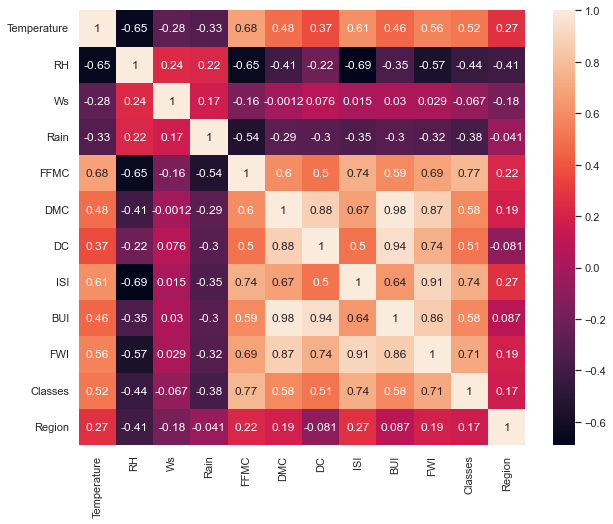

In [287]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(df_final.corr(), annot = True)

## Here our target variable is Temperature based on the task, hence lets try to find out some relation based on our independent features

### FFMC have +ve high relation with Temperature irrespective of all other independent features.

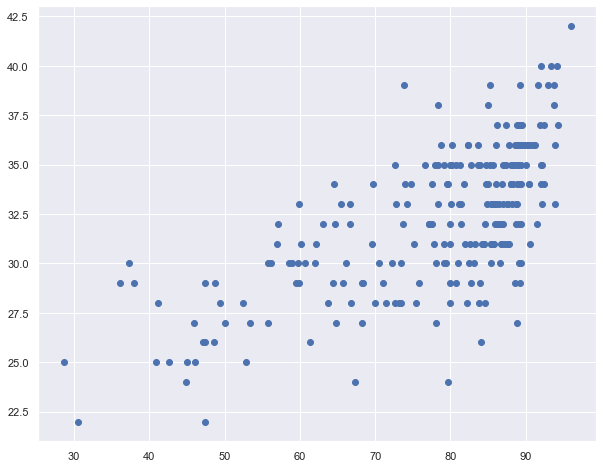

In [453]:
plt.scatter(df_final['FFMC'],df_final['Temperature'])

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

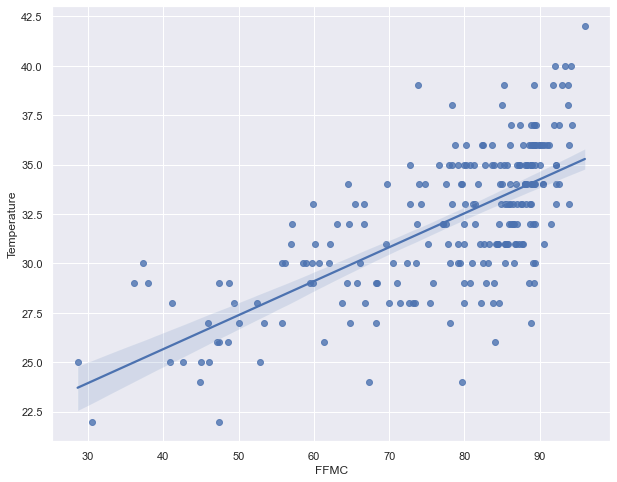

In [454]:
sns.regplot(x ='FFMC',y='Temperature', data = df_final)

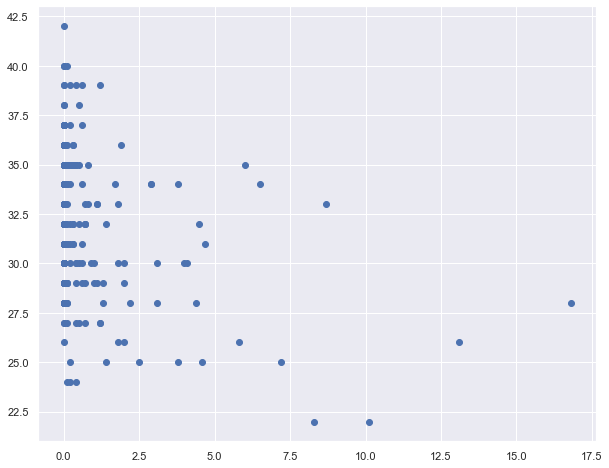

In [288]:
plt.scatter(df_final['Rain'],df_final['Temperature'])

<AxesSubplot:xlabel='Rain', ylabel='Temperature'>

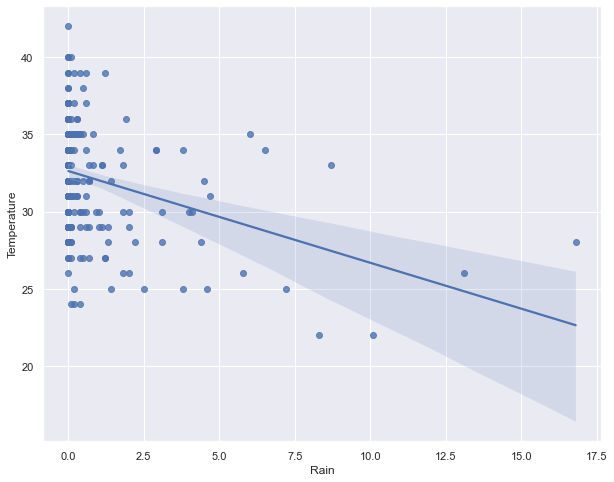

In [290]:
sns.regplot(x ='Rain',y='Temperature', data = df_final)

##Observation: If rain is more then the temperature will be less, then if rain is less temperature will be more

C:\Users\dchakrab.COMPUTACENTER\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

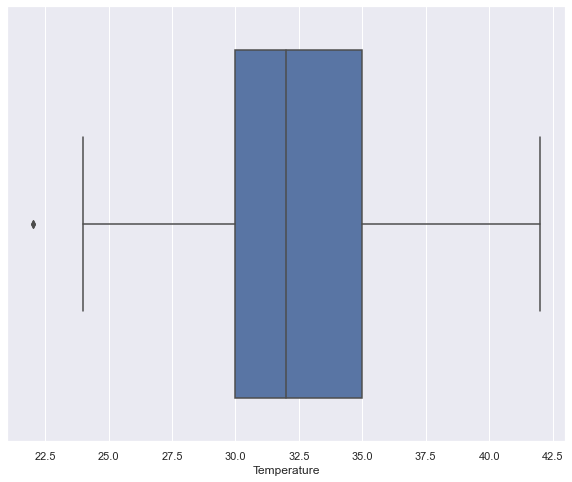

In [292]:
sns.boxplot(df_final['Temperature'])

C:\Users\dchakrab.COMPUTACENTER\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rain'>

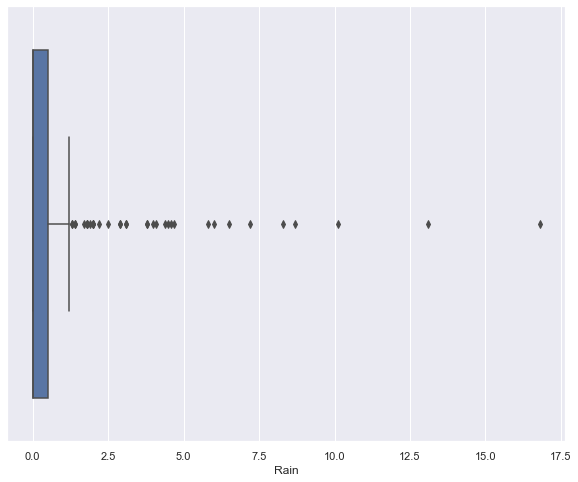

In [293]:
sns.boxplot(df_final['Rain'])

## We have Outliers under Rain feature

In [294]:
## Independent and Dependent feature

In [349]:
Y = df_final.iloc[:,:1]
X = df_final.iloc[:,1:]

In [350]:
Y.head()

,Temperature
0,29
1,29
2,26
3,25
4,27


In [351]:
X.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [352]:
from sklearn.model_selection import train_test_split

In [353]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=10)

In [354]:
X_train

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
39,69,13,0.7,66.6,6.0,9.3,1.1,5.8,0.5,0,0.0
87,82,21,0.0,84.9,47.0,200.2,4.4,59.3,13.2,1,0.0
169,68,15,0.0,86.1,23.9,51.6,5.2,23.9,9.1,1,1.0
232,41,8,0.1,83.9,24.9,86.0,2.7,28.9,5.6,1,1.0
144,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
64,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9,1,0.0
15,89,13,0.7,36.1,1.7,7.6,0.0,2.2,0.0,0,0.0
228,51,13,0.0,88.7,16.0,50.2,6.9,17.8,9.8,1,1.0
125,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0,1.0


In [355]:
y_train

,Temperature
39,33
87,33
169,33
232,29
144,33
...,...
64,34
15,29
228,32
125,30


In [356]:
X_test

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
162,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0,1.0
60,64,17,0.0,87.2,31.9,145.7,6.8,41.2,15.7,1,0.0
61,45,14,0.0,78.8,4.8,10.2,2.0,4.7,0.9,0,0.0
63,63,14,0.3,76.6,5.7,10.0,1.7,5.5,0.8,0,0.0
69,59,17,0.0,87.4,14.8,57.0,6.9,17.9,9.9,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
142,55,14,0.0,86.2,8.3,18.4,5.0,8.2,4.9,1,1.0
32,76,20,0.7,63.1,2.6,9.2,1.3,3.0,0.5,0,0.0
242,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0
7,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0.0


In [357]:
y_test

,Temperature
162,34
60,35
61,36
63,35
69,35
...,...
142,32
32,32
242,24
7,30


##  Standardize or feature scaling the dataset

In [358]:
from sklearn.preprocessing import StandardScaler

In [359]:
scaler=StandardScaler()

In [360]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [361]:
X_train

array([[ 0.46820243, -0.79034424,  0.00333488, ..., -0.83803219,
        -1.07326545, -1.02381286],
       [ 1.32761054,  1.95867921, -0.43761068, ...,  0.81430708,
         0.93173594, -1.02381286],
       [ 0.40209411, -0.10308838, -0.43761068, ...,  0.28087472,
         0.93173594,  0.976741  ],
       ...,
       [-0.72174726, -0.79034424, -0.43761068, ...,  0.37194853,
         0.93173594,  0.976741  ],
       [ 0.13766085, -0.44671631, -0.43761068, ..., -0.77297946,
        -1.07326545,  0.976741  ],
       [ 1.12928559, -1.13397218, -0.43761068, ..., -0.78599001,
        -1.07326545, -1.02381286]])

In [362]:
X_test

array([[-3.91205683e-01, -1.03088380e-01,  1.38916380e+00,
        -1.79797624e-01, -6.05979086e-01, -8.16430403e-01,
        -7.28424722e-01, -6.81393900e-01, -7.99000552e-01,
        -1.07326545e+00,  9.76741004e-01],
       [ 1.37660847e-01,  5.84167484e-01, -4.37610682e-01,
         6.68107054e-01,  1.28591060e+00,  1.94334844e+00,
         5.01383250e-01,  1.61902841e+00,  1.13957071e+00,
         9.31735943e-01, -1.02381286e+00],
       [-1.11839716e+00, -4.46716311e-01, -4.37610682e-01,
         9.37200143e-02, -7.81436597e-01, -8.02246518e-01,
        -6.33824109e-01, -8.21826657e-01, -7.85990007e-01,
        -1.07326545e+00, -1.02381286e+00],
       [ 7.15525305e-02, -4.46716311e-01, -2.48634012e-01,
        -5.67146867e-02, -7.12779310e-01, -8.06299056e-01,
        -7.04774569e-01, -7.68328464e-01, -7.99000552e-01,
        -1.07326545e+00, -1.02381286e+00],
       [-1.92880734e-01,  5.84167484e-01, -4.37610682e-01,
         6.81782936e-01, -1.85778541e-02,  1.46047535e-01,
  

In [ ]:
##Model Training

In [363]:
from sklearn.linear_model import LinearRegression

In [364]:
regression=LinearRegression()

In [366]:
regression.fit(X_train,y_train)

LinearRegression()

In [367]:
print(regression.coef_)

[[-0.9866291  -0.55868884 -0.3177714   1.05837864 -0.2834324   0.87131227
   0.60687577 -0.19769614 -0.29606829 -0.04513606  0.26784727]]


In [368]:
print(regression.intercept_)

[32.12352941]


## Prediction for the test data

In [369]:
reg_pred=regression.predict(X_test)

In [370]:
reg_pred

array([[31.63502118],
       [33.16683693],
       [33.02202033],
       [31.55593985],
       [32.85696363],
       [34.57762233],
       [33.83694176],
       [34.04659463],
       [31.89651207],
       [32.87850126],
       [33.67765425],
       [27.7167955 ],
       [35.05328757],
       [29.43061592],
       [31.41062147],
       [32.23159235],
       [34.00962157],
       [27.96113466],
       [36.14877704],
       [34.10665594],
       [32.61091625],
       [34.58141103],
       [33.46567662],
       [33.03365673],
       [36.17699285],
       [29.45488976],
       [32.24518809],
       [32.526453  ],
       [27.52867589],
       [32.28585608],
       [25.80189704],
       [27.39047204],
       [33.77177731],
       [31.79120305],
       [32.87743148],
       [31.07884303],
       [29.0848157 ],
       [32.7503098 ],
       [27.73635352],
       [35.19977505],
       [32.79533958],
       [33.949611  ],
       [34.09357661],
       [31.73808648],
       [36.29909268],
       [33

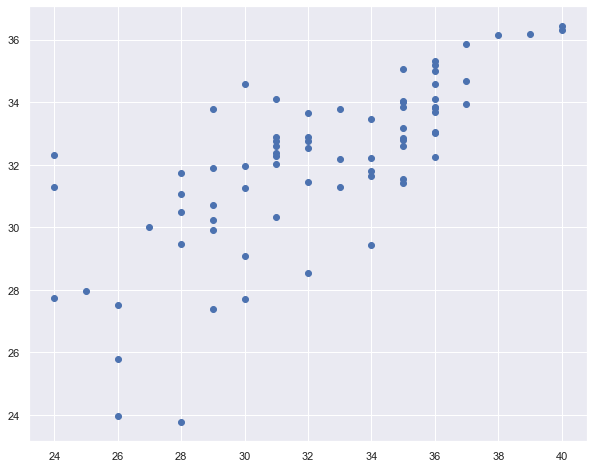

In [371]:
plt.scatter(y_test,reg_pred)

In [372]:
### residuals

residuals = y_test-reg_pred

C:\Users\dchakrab.COMPUTACENTER\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

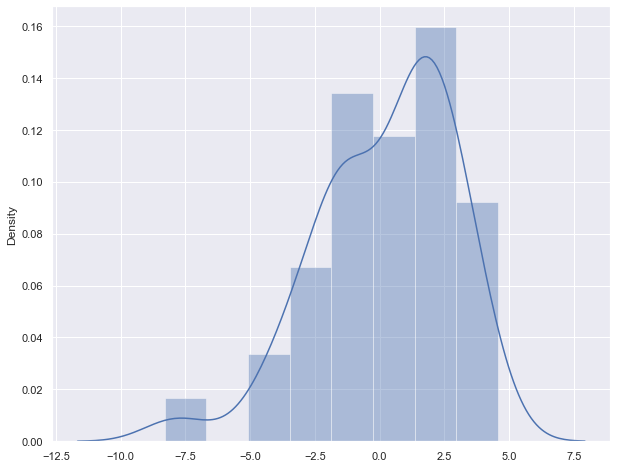

In [373]:
sns.distplot(residuals,kde=True)

## Its a normal distribution with left sqewed bit

## Scatter plot with predictions and residuals

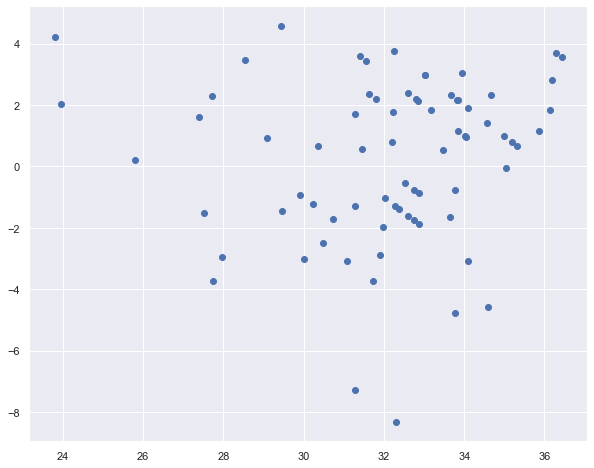

In [374]:
plt.scatter(reg_pred, residuals)

##  Performance matrix

In [375]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, reg_pred))
print(mean_absolute_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

6.967234176599206
2.200636329732108
2.639551889355314


In [347]:
## R2 value

In [378]:
from sklearn.metrics import r2_score

In [380]:
r2_score(y_test,reg_pred)

0.5342760177359009

## Model is 53% accurate
## Adjusted R2 score value

In [383]:
print(1-(1-r2_score(y_test, reg_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))

0.45164756926968974


## Model is 45% Accuarate

## Ridge regression

In [385]:
from sklearn.linear_model import Ridge

In [386]:
ridge = Ridge()

In [387]:
ridge.fit(X_train,y_train)

Ridge()

In [388]:
print(ridge.coef_)

[[-0.98876056 -0.55514619 -0.32321226  1.04686527 -0.30254862  0.78875154
   0.56411688 -0.11037359 -0.25421888 -0.03433455  0.25927849]]


In [389]:
print(ridge.intercept_)

[32.12352941]


In [390]:
ridge_pred=ridge.predict(X_test)

In [391]:
ridge_pred

array([[31.62723627],
       [33.16474226],
       [33.02492004],
       [31.56319004],
       [32.86008777],
       [34.57562499],
       [33.80207235],
       [33.96938602],
       [31.90764529],
       [32.88160407],
       [33.68764326],
       [27.73316405],
       [35.05188942],
       [29.40610061],
       [31.42178601],
       [32.23873473],
       [34.00344833],
       [27.99035795],
       [36.14273216],
       [34.14103604],
       [32.61334755],
       [34.51086938],
       [33.47135072],
       [33.04089635],
       [36.14225137],
       [29.45441442],
       [32.21120775],
       [32.54096868],
       [27.55749123],
       [32.27363762],
       [25.82084715],
       [27.4097074 ],
       [33.77106307],
       [31.78275028],
       [32.87377032],
       [31.05819791],
       [29.08331246],
       [32.74324604],
       [27.76514546],
       [35.17870454],
       [32.77606809],
       [33.96709478],
       [34.09555501],
       [31.72118383],
       [36.28737587],
       [33

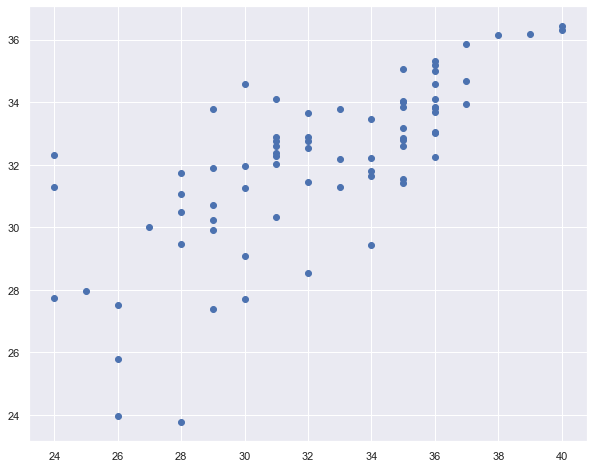

In [392]:
plt.scatter(y_test,reg_pred)

In [394]:
## Residuals
residuals1 = y_test-ridge_pred

In [395]:
residuals1

,Temperature
162,2.372764
60,1.835258
61,2.975080
63,3.436810
69,2.139912
...,...
142,-1.643231
32,3.445193
242,-8.291433
7,-1.984331


C:\Users\dchakrab.COMPUTACENTER\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

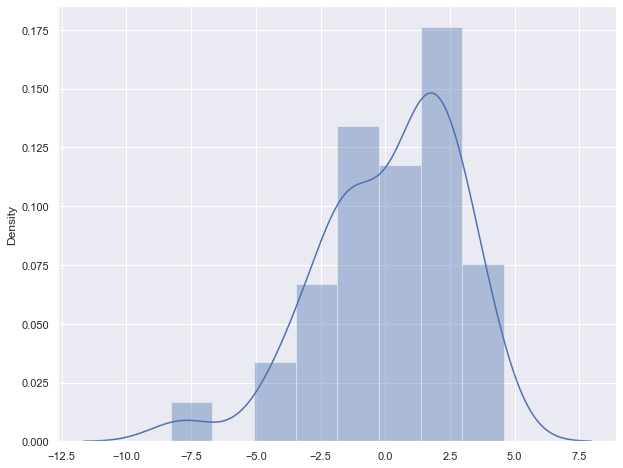

In [396]:
sns.distplot(residuals1,kde=True)

## It's left squeue which we can overcome through hyperparameter tuning

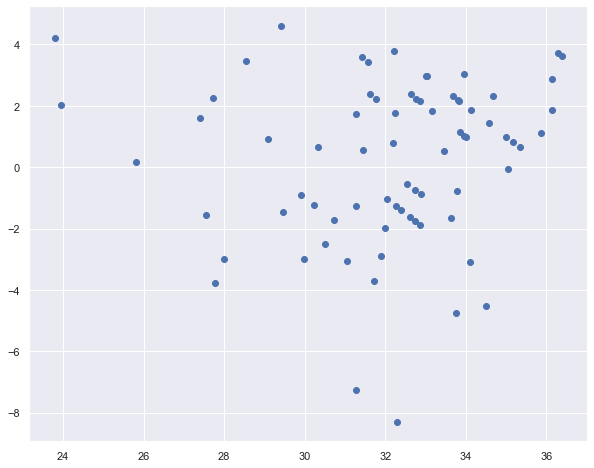

In [397]:
plt.scatter(ridge_pred, residuals1)

In [398]:
### Performance metrix

In [399]:
print(mean_squared_error(y_test, ridge_pred))
print(mean_absolute_error(y_test, ridge_pred))
print(np.sqrt(mean_squared_error(y_test, ridge_pred)))

6.961845963559434
2.200867023587058
2.6385310238008257


### R2 score value

In [400]:
r2_score(y_test,ridge_pred)

0.5346361922284706

### Adjusted R2 score value

In [401]:
print(1-(1-r2_score(y_test, ridge_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))

0.45207164568836045


## Lasso Regression

In [403]:
from sklearn.linear_model import Lasso

In [404]:
lasso = Lasso(alpha = 0.1)

In [405]:
lasso

Lasso(alpha=0.1)

In [406]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [408]:
lasso.coef_

array([-0.99875601, -0.44611752, -0.23421426,  1.14497172,  0.        ,
        0.24441754,  0.21307134,  0.        ,  0.        ,  0.        ,
        0.08240094])

In [409]:
lasso.intercept_

array([32.12352941])

In [410]:
lasso_predict = lasso.predict(X_test)

In [414]:
lasso_predict

array([31.75474084, 33.09034651, 33.23412869, 31.81304674, 33.00188271,
       34.40966508, 33.59460944, 33.17039307, 32.07548286, 33.00179636,
       33.70155011, 28.13903421, 34.9829361 , 29.54788703, 31.97804923,
       32.25303446, 33.76868341, 28.09835348, 35.93165031, 34.31034883,
       32.67906551, 33.69009093, 33.60130422, 33.04687406, 35.77236677,
       29.31696751, 32.06737461, 32.88000863, 27.79462139, 32.11176336,
       26.47094617, 27.07749791, 33.85140223, 32.0303361 , 32.89675181,
       30.94392641, 29.09831439, 32.60339989, 27.81966774, 34.91417334,
       32.63176683, 34.00725163, 34.12281903, 31.51313172, 35.94481465,
       33.91804251, 25.23443937, 34.86603711, 33.85810949, 29.92900734,
       31.36373133, 32.52621689, 35.30543061, 32.19392799, 30.75700457,
       30.36636343, 32.64411787, 35.85088782, 31.32820808, 33.6083265 ,
       32.24646658, 32.60265033, 30.94853186, 25.04915378, 31.64551794,
       35.91059488, 30.23659279, 30.02480133, 34.59178245, 33.50

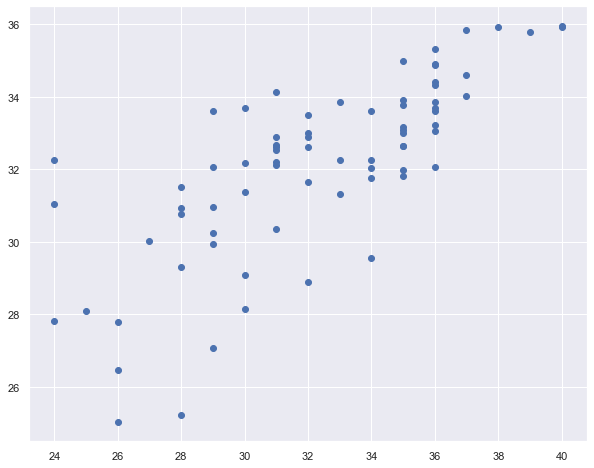

In [412]:
plt.scatter(y_test,lasso_predict)

In [422]:
lasso_predict

array([31.75474084, 33.09034651, 33.23412869, 31.81304674, 33.00188271,
       34.40966508, 33.59460944, 33.17039307, 32.07548286, 33.00179636,
       33.70155011, 28.13903421, 34.9829361 , 29.54788703, 31.97804923,
       32.25303446, 33.76868341, 28.09835348, 35.93165031, 34.31034883,
       32.67906551, 33.69009093, 33.60130422, 33.04687406, 35.77236677,
       29.31696751, 32.06737461, 32.88000863, 27.79462139, 32.11176336,
       26.47094617, 27.07749791, 33.85140223, 32.0303361 , 32.89675181,
       30.94392641, 29.09831439, 32.60339989, 27.81966774, 34.91417334,
       32.63176683, 34.00725163, 34.12281903, 31.51313172, 35.94481465,
       33.91804251, 25.23443937, 34.86603711, 33.85810949, 29.92900734,
       31.36373133, 32.52621689, 35.30543061, 32.19392799, 30.75700457,
       30.36636343, 32.64411787, 35.85088782, 31.32820808, 33.6083265 ,
       32.24646658, 32.60265033, 30.94853186, 25.04915378, 31.64551794,
       35.91059488, 30.23659279, 30.02480133, 34.59178245, 33.50

## Performance Metrics

In [423]:
print(mean_squared_error(y_test, lasso_predict))
print(mean_absolute_error(y_test, lasso_predict))
print(np.sqrt(mean_squared_error(y_test, lasso_predict)))

6.714166421664919
2.181881942503933
2.591170859218843


### R2 Score value

In [424]:
r2_score(y_test,ridge_pred)

0.5346361922284706

### Adjusted R2 Score Value

In [425]:
print(1-(1-r2_score(y_test, ridge_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))

0.45207164568836045


## Elastic Net

In [426]:
from sklearn.linear_model import ElasticNet

In [427]:
el_net = ElasticNet()

In [428]:
el_net.fit(X_train,y_train)

ElasticNet()

In [429]:
print(el_net.coef_)

[-0.62153098 -0.13608355 -0.12499359  0.69448406  0.03983696  0.
  0.25607847  0.01102269  0.10815947  0.07965409  0.        ]


In [430]:
print(el_net.intercept_)

[32.12352941]


In [441]:
el_net_pred = el_net.predict(X_test)

In [444]:
el_net_pred=el_net_pred.reshape(74,1)

Text(0, 0.5, 'Test Predicted Data')

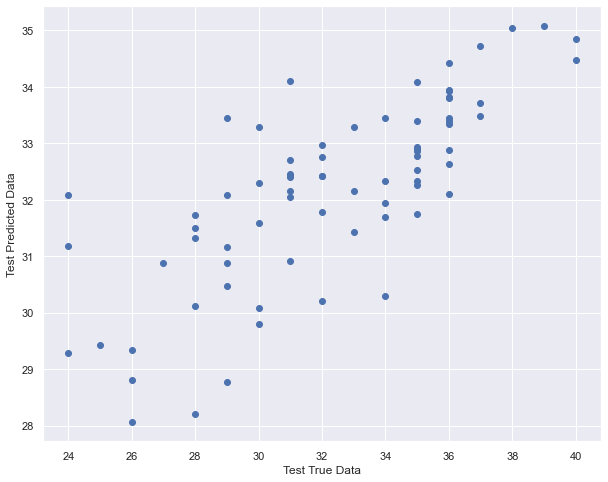

In [434]:
plt.scatter(y_test,el_net_pred)
plt.xlabel('Test True Data')
plt.ylabel('Test Predicted Data')

### It's bit in linear model we can say

In [436]:
## Now we need to calculate residual

In [445]:
residual = y_test - el_net_pred

In [446]:
residual

,Temperature
162,2.307893
60,2.127900
61,3.373776
63,3.257713
69,2.057664
...,...
142,-0.977655
32,1.784733
242,-8.082039
7,-2.293049


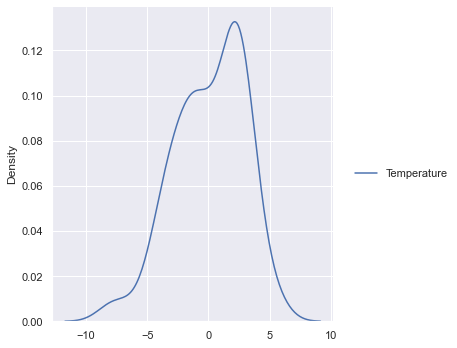

In [448]:
sns.displot(residual,kind='kde')

### Approximately in normal distribution we can say.

### Scatter plot with predictions and residuals
### Uniform distribution

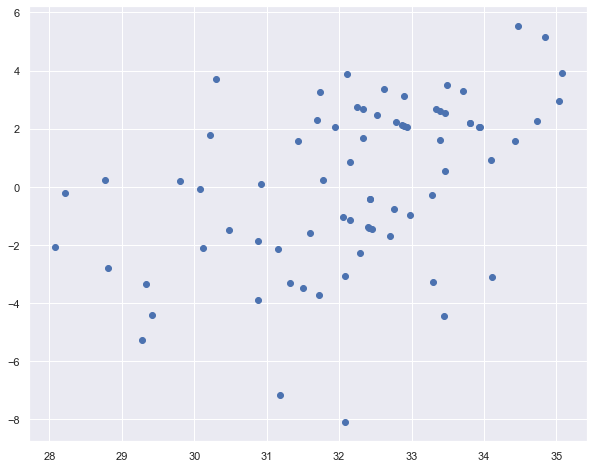

In [449]:
plt.scatter(el_net_pred, residual)

### Performance Metrics

In [450]:
print(mean_squared_error(y_test, el_net_pred))
print(mean_absolute_error(y_test, el_net_pred))
print(np.sqrt(mean_squared_error(y_test, el_net_pred)))

8.083371037461514
2.38748638704016
2.8431269822963436


### R2 score value

In [451]:
r2_score(y_test,el_net_pred)

0.45966797523053604

### Adjusted R2 Score value

In [452]:
print(1-(1-r2_score(y_test, el_net_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))

0.36380261599724406
